In [198]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from google.colab import files
uploaded = files.upload()



Saving gender_submission.csv to gender_submission (4).csv
Saving test.csv to test (4).csv
Saving train.csv to train (4).csv


In [199]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
baseline_df = pd.read_csv('gender_submission.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [200]:

label_encoder_sex = LabelEncoder()
train_df['Sex'] = label_encoder_sex.fit_transform(train_df['Sex'])
test_df['Sex'] = label_encoder_sex.fit_transform(test_df['Sex'])

train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].median())
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())

common_value_train = train_df["Embarked"].mode()[0]
train_df["Embarked"] = train_df["Embarked"].fillna(common_value_train)
common_value_test = test_df["Embarked"].mode()[0]
test_df["Embarked"] = test_df["Embarked"].fillna(common_value_test)

label_encoder_embarked = LabelEncoder()
train_df["Embarked"] = label_encoder_embarked.fit_transform(train_df["Embarked"])
test_df["Embarked"] = label_encoder_embarked.fit_transform(test_df["Embarked"])

train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"]
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"]


train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,2,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0,0


<Axes: xlabel='FamilySize', ylabel='Survived'>

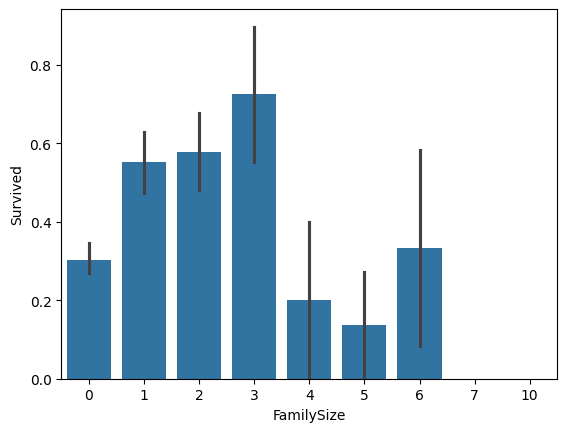

In [201]:
sns.barplot(data=train_df,x='FamilySize',y='Survived')

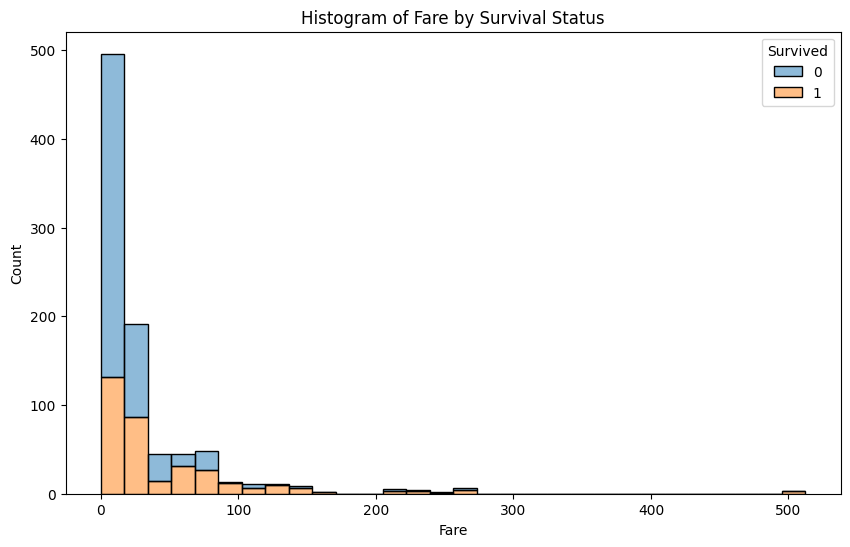

In [202]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=30, alpha=0.5, multiple='stack')

plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Histogram of Fare by Survival Status')

plt.show()

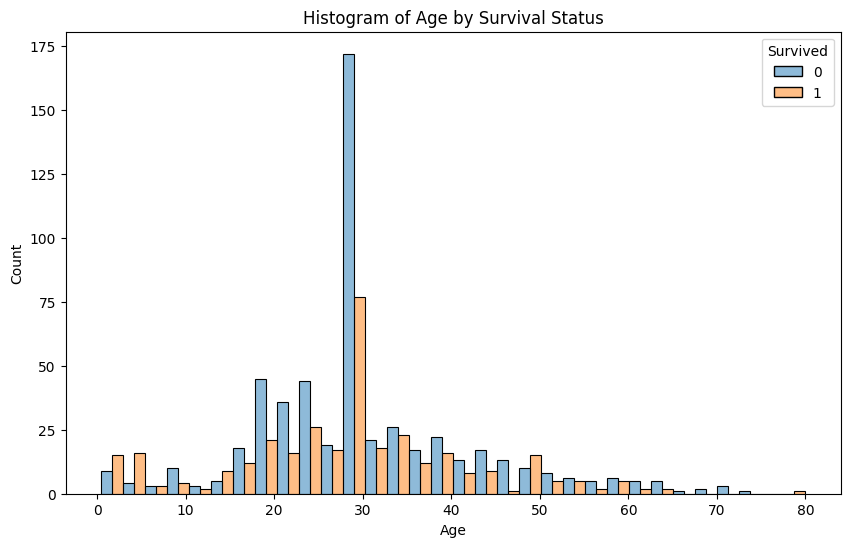

In [203]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', bins=32, alpha=0.5, multiple='dodge')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age by Survival Status')

plt.show()

In [205]:
scaler = StandardScaler()
train_df[["Age", "Fare",'FamilySize']] = scaler.fit_transform(train_df[["Age", "Fare",'FamilySize']])
test_df[["Age", "Fare",'FamilySize']] = scaler.fit_transform(test_df[["Age", "Fare",'FamilySize']])

x_train = train_df[["Sex", "Age", "Pclass", "Fare", "Embarked", "SibSp", "Parch",'FamilySize']]
y_train = train_df["Survived"]

clf = SVC(kernel="rbf", random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)
accuracy_train = accuracy_score(y_train, y_pred)

accuracy_train

0.8316498316498316

In [207]:
#train_df_selected_features = train_df[['Sex'] + list(train_df.columns[-7:])]
#test_df_selected_features = test_df[['Sex'] + list(test_df.columns[-7:])]
#target = train_df['Survived']

x_test = test_df[["Sex", "Age", "Pclass", "Fare", "Embarked", "SibSp", "Parch",'FamilySize']]

y_pred_test = clf.predict(x_test)

our_prediction = baseline_df.copy()
our_prediction["Survived"] = y_pred_test
our_prediction

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [208]:
our_prediction.to_csv('our_prediction.csv',index=False)

In [209]:
files.download('our_prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>